In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
def exponential_expected_log_wealth(fraction_of_wealth):
    """
    Formula is (1 + f u)^#heads 8 (1-f d)^#tails
    In the example in the blog u = d = 1 and for 100 rounds, when p = .6, #heads = 60 and #tails = 40
    """
    return (1+fraction_of_wealth)**60 * (1-fraction_of_wealth)**40

(0.0, 8.0)

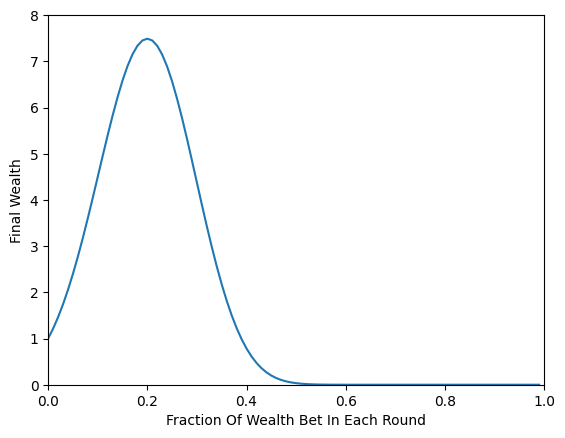

In [4]:
xs = np.arange(0, 1, .01)
sns.lineplot(x=xs, y=exponential_expected_log_wealth(xs))
plt.xlabel("Fraction Of Wealth Bet In Each Round")
plt.ylabel("Final Wealth")
plt.xlim(0, 1)
plt.ylim(0, 8)

In [5]:
# Parameters from the example in the post
u = 1.0
d = 1.0
p = .6
q = .4

In [6]:
wealth_fraction_to_bet = .2
up_factor = (1 + wealth_fraction_to_bet * u)
down_factor = ( 1 - wealth_fraction_to_bet * d)

In [7]:
number_of_trajectories = 30
rounds = 300

np.random.seed(12)
factors = np.random.choice(a=[up_factor, down_factor],p = [p, q], size=(number_of_trajectories, rounds))

In [108]:
trajectories = np.log2(np.cumprod(factors, axis=1))

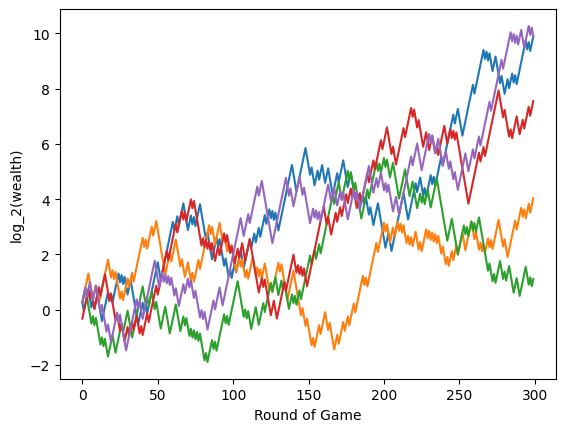

In [112]:
for i in range(5):
    sns.lineplot(trajectories[i])
    plt.xlabel("Round of Game")
    plt.ylabel("log_2(wealth)")

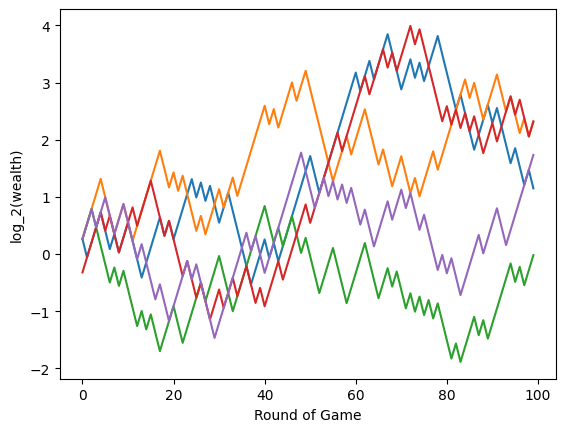

In [113]:
for i in range(5):
    sns.lineplot(trajectories[i][0:100])
    plt.xlabel("Round of Game")
    plt.ylabel("log_2(wealth)")

In [8]:
factors = np.random.choice(a=[up_factor, down_factor],p = [p, q], size=(4000000, 100))
final_wealth = np.log2(np.prod(factors, axis=1))

(-10.0, 12.0)

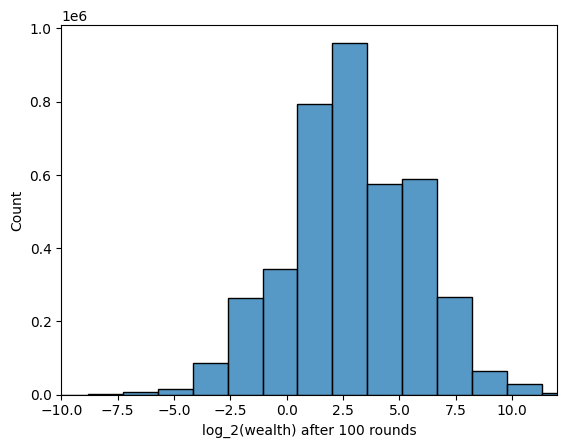

In [9]:
sns.histplot(final_wealth, bins=20)
plt.xlabel("log_2(wealth) after 100 rounds")
plt.xlim(-10,12)

In [10]:
np.mean(final_wealth)

2.9060531532095064

In [12]:
len(final_wealth[final_wealth<0.0])/4000000

0.1787675

The Cost of Being Wrong

In [21]:
factors_wrong_p = np.random.choice(a=[up_factor, down_factor], p = [.52, .48], size=(number_of_trajectories, rounds))

In [22]:
trajectories_wrong_p = np.log2(np.cumprod(factors_wrong_p, axis=1))

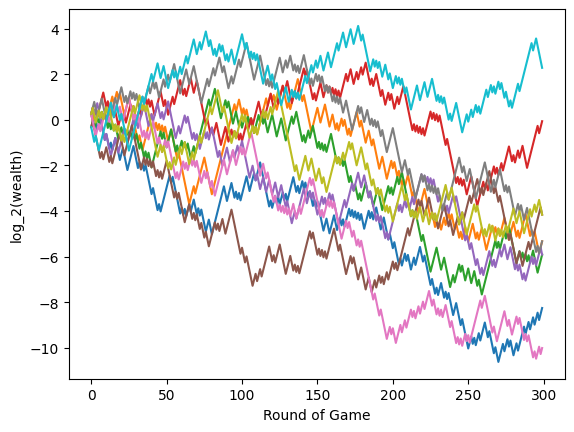

In [25]:
for i in range(10):
    sns.lineplot(trajectories_wrong_p[i])
    plt.xlabel("Round of Game")
    plt.ylabel("log_2(wealth)")